## Accelerate Sensitivity Analysis & Model Calibration Using pyGSFLOW


<img src = "./figures/WorkFlow.PNG">





### Agenda
* Plot PRMS 2D data
* Change 2D data by a scalar factor
* Change zones in 2D maps using conditional masks
* Simple sensitivity analysis
* Comparing simulations and measurements
* Calibration


In [1]:
import os
from gsflow import GsflowModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## The GSFLOW model is loaded as follows
control_file = os.path.join(".", "data", "sagehen", "gsflow", "saghen_new_cont.control")
gs = GsflowModel.load_from_file(control_file)


Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_0.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_1.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_2.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_3.params
------------------------------------
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks a

In [3]:
#gs.prms.Data.data_df.to_csv("temp.csv")
gs.prms.parameters.record_names

['ncascade',
 'ncascdgw',
 'ndays',
 'ndepl',
 'ndeplval',
 'nevap',
 'ngw',
 'ngwcell',
 'nhru',
 'nhrucell',
 'nlake',
 'nlake_hrus',
 'nmonths',
 'nobs',
 'nrain',
 'nreach',
 'nsegment',
 'nsnow',
 'nsol',
 'nssr',
 'nsub',
 'ntemp',
 'one',
 'adjmix_rain',
 'basin_tsta',
 'carea_max',
 'dday_intcp',
 'dday_slope',
 'fastcoef_lin',
 'fastcoef_sq',
 'gwflow_coef',
 'hru_percent_imperv',
 'hru_subbasin',
 'hru_tlaps',
 'hru_tsta',
 'jh_coef',
 'pref_flow_den',
 'rain_adj',
 'sat_threshold',
 'slowcoef_lin',
 'slowcoef_sq',
 'smidx_coef',
 'snow_adj',
 'soil_moist_max',
 'soil_rechr_max',
 'ssr2gw_rate',
 'subbasin_down',
 'tmax_allrain',
 'tmax_allsnow',
 'tmax_lapse',
 'tmin_lapse',
 'tsta_elev',
 'cascade_flg',
 'cascade_tol',
 'circle_switch',
 'gvr_cell_id',
 'gw_down_id',
 'gw_pct_up',
 'gw_strmseg_down_id',
 'gw_up_id',
 'hru_down_id',
 'hru_pct_up',
 'hru_strmseg_down_id',
 'hru_up_id',
 'albset_rna',
 'albset_rnm',
 'albset_sna',
 'albset_snm',
 'cecn_coef',
 'den_init',
 'de

### (1) Visualize PRMS data

In [4]:
print(gs.prms.parameters.get_record("ssr2gw_rate"))


####
ssr2gw_rate 10
1
nssr
6468
2
0.0
0.0
0.0
0.0.
.
.
####


In [5]:
Params = gs.prms.parameters
gs.prms.parameters.get_values("ssr2gw_rate")

array([0., 0., 0., ..., 0., 0., 0.])

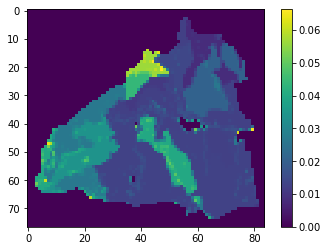

In [6]:
nrow = 77
ncol = 84
ssr2gw_rate = Params.get_values("ssr2gw_rate").reshape(nrow, ncol)
plt.imshow(ssr2gw_rate)
plt.colorbar();

In [7]:
# 2D data
param = gs.prms.parameters.get_record('rain_adj')
print(param)


####
rain_adj 10
2
nhru
nmonths
77616
2
1.223373
1.214444
1.205549
1.196689.
.
.
####


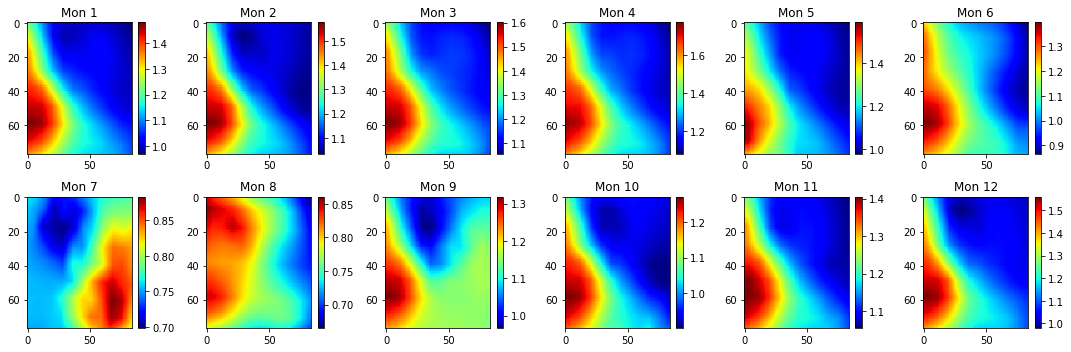

In [8]:
rainadj = gs.prms.parameters.get_values('rain_adj')
rainadj = rainadj.reshape(12,nrow,ncol)
fig = plt.figure(figsize=(15,5)); 
for mon in range(12): 
    txt = "Mon {}".format(mon+1)
    ax = plt.subplot(2,6,mon+1) 
    ax.set_title(txt)
    img = ax.imshow(rainadj[mon,:,:], cmap='jet')
    
    fig.colorbar(img, ax= ax)
    ax.set_aspect('auto')
plt.tight_layout(h_pad=1)    



### (2) Scale parameter by a scalar value

In this exercise, let us change the model mode to "PRMS" becuase it's quick to run it. The same exercise can be made using GSFLOW model; however, runing the model will take a longer period of time

In [9]:
gs.control.set_values("model_mode", ['PRMS'])

In [10]:
gs.write_input(workspace=os.path.join(".", "data", "temp"))

Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...


In [11]:
gs.gsflow_exe = os.path.abspath(os.path.join("..", "bin", "gsflow.exe"))
gs.run_model()

pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1997/03/31



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:39:14

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:39:22

Execu

(False, [])

In [12]:
gs.prms.get_StatVar()

Loading the statvar output file .....
Finished Load the statvar output file .....


,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,5353,1997,3,27,0,0,0,24.843658,1.659205,12.377174,0.043215,10.807280,0.000000,0.000000,18.083924,0.891914,0.059386,525.456266,0.044776,1997-03-27
5353,5354,1997,3,28,0,0,0,26.992459,1.679112,13.545851,0.047304,11.767496,0.000000,0.000000,17.805016,0.881564,0.056252,510.869867,0.047048,1997-03-28
5354,5355,1997,3,29,0,0,0,15.854925,1.699274,5.785059,0.020186,8.370591,0.000000,0.000000,17.629650,0.871146,0.043422,518.188000,0.048017,1997-03-29
5355,5356,1997,3,30,0,0,0,21.940446,1.719722,9.378418,0.032739,10.842306,0.012579,0.007007,17.445031,0.962941,0.034277,525.355649,0.048765,1997-03-30


In [13]:
gs.prms.stat.stat_df


,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,5353,1997,3,27,0,0,0,24.843658,1.659205,12.377174,0.043215,10.807280,0.000000,0.000000,18.083924,0.891914,0.059386,525.456266,0.044776,1997-03-27
5353,5354,1997,3,28,0,0,0,26.992459,1.679112,13.545851,0.047304,11.767496,0.000000,0.000000,17.805016,0.881564,0.056252,510.869867,0.047048,1997-03-28
5354,5355,1997,3,29,0,0,0,15.854925,1.699274,5.785059,0.020186,8.370591,0.000000,0.000000,17.629650,0.871146,0.043422,518.188000,0.048017,1997-03-29
5355,5356,1997,3,30,0,0,0,21.940446,1.719722,9.378418,0.032739,10.842306,0.012579,0.007007,17.445031,0.962941,0.034277,525.355649,0.048765,1997-03-30


In [14]:
basic_cfs_before = gs.prms.stat.stat_df['basin_cfs_1'].values

### Adjusting values for calibration

we can use pygsflow to change parameter values and display the results of our adjustments

we'll start by adjusting `rain_adj` and `snow_adj`

In [15]:
## save a copy of rain_adj before we change ir
rain_adj_backup = np.copy(gs.prms.parameters.get_values('rain_adj'))
snow_adj_backup = np.copy(gs.prms.parameters.get_values('snow_adj'))

In [16]:
## Let us just remove the effect of rain by assiging rain adj factor to 0.0
newrainadj = rain_adj_backup * 0.0
gs.prms.parameters.set_values('rain_adj', newrainadj)
gs.prms.parameters.set_values('snow_adj', 0.0 * snow_adj_backup)

# Write input files
gs.write_input(workspace=os.path.join(".", "data", "temp", "prms_files"))

# run
gs.run_model()

# Get results
gs.prms.get_StatVar() 
basic_cfs_after = gs.prms.stat.stat_df['basin_cfs_1'].values

Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produ

C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


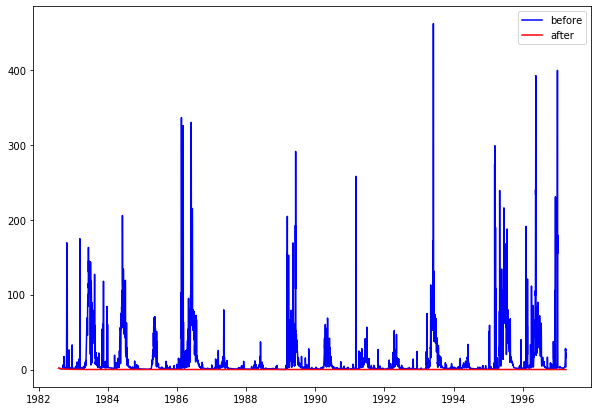

In [17]:
dates = gs.prms.stat.stat_df['Date'].values
plt.figure(figsize=(10,7))
plt.plot(dates, (basic_cfs_before), 'b', label = 'before' )
plt.plot(dates,(basic_cfs_after), 'r', label = 'after' )
plt.legend()

### (2) Use "array masking" to change parameters


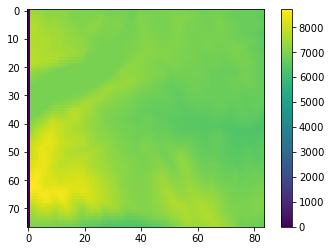

In [18]:
# masking
Params = gs.prms.parameters
hru_elev = np.copy(Params.get_values("hru_elev"))
hru_elev = hru_elev.reshape(nrow, ncol)
plt.imshow(hru_elev)
plt.colorbar();

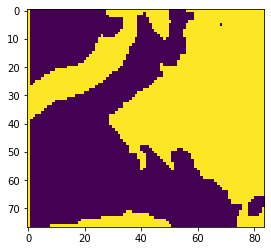

In [19]:
mask = hru_elev<7000
plt.imshow(mask); # ; plt.colorbar()

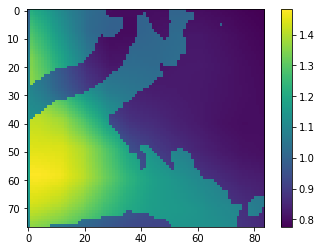

In [20]:
rain_adj_jan = np.copy(rainadj[0,:,:])
rain_adj_jan[mask] = rain_adj_jan[mask] * 0.8
plt.imshow(rain_adj_jan)
plt.colorbar();

### Can you change `ssr2_gw_rate` values in subbasin 10?

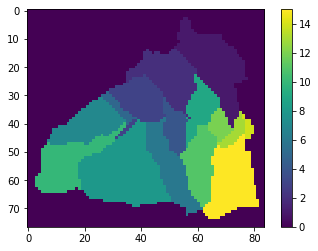

In [21]:
hru_subbasin = gs.mf.uzf.irunbnd.array
plt.imshow(hru_subbasin)
plt.colorbar();

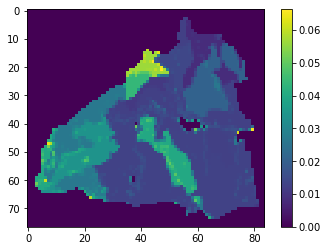

In [22]:
ssr2gw_rate = Params.get_values("ssr2gw_rate").reshape(nrow, ncol)
plt.imshow(ssr2gw_rate)
plt.colorbar();

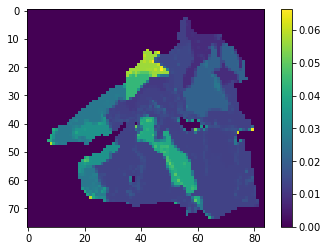

In [23]:
ssr2gw_rate[hru_subbasin==10] = ssr2gw_rate[hru_subbasin==10] * 0.0
plt.imshow(ssr2gw_rate)
plt.colorbar();

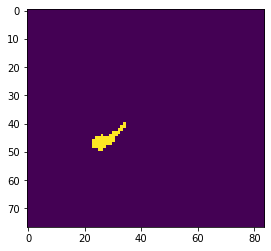

In [24]:
# The mask can also be complex 
mask2 = np.logical_and(hru_subbasin==10, hru_elev <7500)
plt.imshow(mask2);

## (3) Sensitivity Analysis

Before Calibration, let us do sensitivity analysis.... a simple one!

In [25]:
%%time
#parameters = ['gwflow_coef', 'gwsink_coef', 'ssr2gw_rate', 'slowcoef_lin', 'slowcoef_sq', 'smidx_coef', 
#              'snarea_curve', 'snarea_thresh']

parameters = ['snarea_curve', 'ssr2gw_rate',  'gwflow_coef']
control_file = os.path.join(".", "data", "sagehen", "gsflow", "saghen_new_cont.control")


# load model files
gs = GsflowModel.load_from_file(control_file=control_file)
gs.gsflow_exe = os.path.abspath(os.path.join("..", "bin", "gsflow.exe"))

# Let us use PRMS
gs.control.set_values("model_mode", ['PRMS'])
gs.control.set_values("print_debug", [-1]) # this will turn off screen printout and reduce output to the notebook
gs.control.set_values(name='end_time', values=[1990,1,1,0,0,0])

Params = gs.prms.parameters

# Save a copy of parameter values before they changes
orig_params = {}
for par in parameters:
    orig_params[par] = np.copy(Params.get_values(par))

orig_params

Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_0.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_1.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_2.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_3.params
------------------------------------
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks a

{'snarea_curve': array([0.05, 0.24, 0.4 , 0.53, 0.65, 0.75, 0.82, 0.88, 0.93, 0.99, 1.  ,
        0.05, 0.25, 0.4 , 0.48, 0.54, 0.58, 0.61, 0.64, 0.66, 0.68, 0.7 ]),
 'ssr2gw_rate': array([0., 0., 0., ..., 0., 0., 0.]),
 'gwflow_coef': array([0.014])}

##### Automation of Sensitivity Analysis
We are going to use two loops: loop over parameters and loop over scaling factor. Within the parameter loop, the values of the parameter will be changed by multipling it by a list of scaling factors.

In [26]:
%%time
# Parameters to be explored....
#parameters = ['gwflow_coef', 'gwsink_coef', 'ssr2gw_rate', 'slowcoef_lin', 'slowcoef_sq', 'smidx_coef',
#              'snarea_curve', 'snarea_thresh']
parameters = ['snarea_curve', 'ssr2gw_rate',  'gwflow_coef']
factors = [0.5, 0.75, 1.0, 1.25, 1.5]
all_sens = {}

## Nested Loop
for par in parameters: # loop over parameters   
    responce = []
    for facc in factors: # loop over scaling factor       
        print("\n****** Par =  {}, Facc = {} ****** ".format(par, facc))
        
        Params.set_values(name=par, values = orig_params[par]*facc) # change the parameter  
        
        gs.write_input(workspace=os.path.join(".", "data", "temp"))                   # write input
        
        gs.run_model()                                              # run the model and wait for results
        
        gs.prms.get_StatVar()                                       # load results from Statvar 
        
        mean_outflow = gs.prms.stat.stat_df['basin_cfs_1'].mean()   # compute the mean stream flow
        
        responce.append(mean_outflow)                               # save results
    
    all_sens[par] = responce
    Params.set_values(name=par, values = orig_params[par])



****** Par =  snarea_curve, Facc = 0.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results 

Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:39:56

Execution end   date and time (


Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:40:15

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:40:20

Execution elapsed time    0 minutes  4.48 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 1.0 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.ex


                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:40:34

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:40:38

Execution elapsed time    0 minutes  4.52 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 0.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\exam

Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 1.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results request

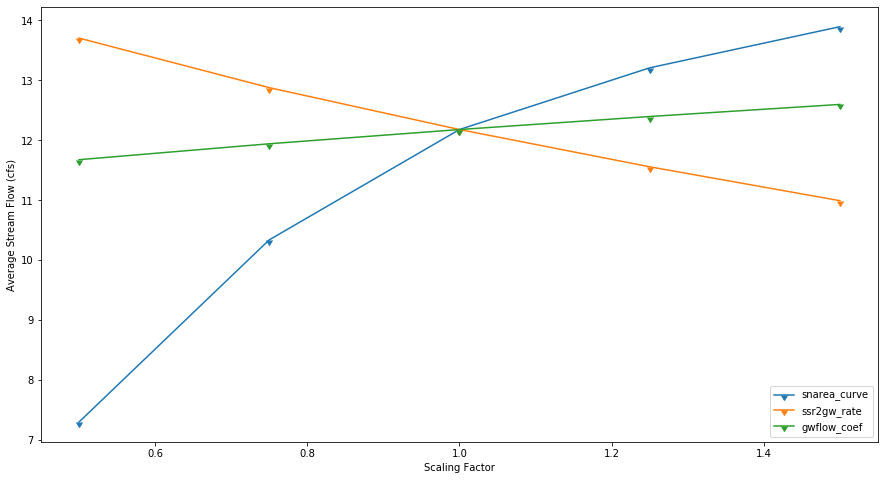

In [27]:
plt.figure(figsize=(15,8))
for par in all_sens.keys():
    plt.plot(factors, all_sens[par], label = par, marker=11 )
plt.ylabel("Average Stream Flow (cfs)")
plt.xlabel("Scaling Factor")
plt.legend()
    

## (4) Simple Calibration 


### (4.a) Error Evaluation


In [28]:
# Before we start let us load the model
control_file = os.path.join(".", "data", "sagehen", "gsflow", "saghen_new_cont.control")
gs = GsflowModel.load_from_file(control_file)
gs.gsflow_exe = os.path.abspath(os.path.join("..", "bin", "gsflow.exe"))
gs.control.set_values("model_mode", ['PRMS']) # todo: remove list requirement when no list is necessary. Provide check on datatype
gs.control.set_values("print_debug", [-1]) # this will turn off screen printout and reduce output to the notebook
gs.control.set_values(name='end_time', values=[1990,1,1,0,0,0])
Params = gs.prms.parameters

gs.write_input(workspace=os.path.join(".", "data", "temp"))              # write input
gs.run_model()                                         # run the model
gs.prms.get_StatVar()  
# gs.run_model()   


Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_0.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_1.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_2.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_3.params
------------------------------------
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks a

,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,2707,1989,12,28,0,0,0,0.801186,0.784269,0.000287,0.000001,0.016630,0.000000,0.000000,3.557970,0.995720,0.001568,94.706776,0.007212,1989-12-28
2707,2708,1989,12,29,0,0,0,0.793906,0.778122,0.000271,0.000001,0.015513,0.000000,0.000000,3.557052,0.995558,0.000930,70.577229,0.007072,1989-12-29
2708,2709,1989,12,30,0,0,0,0.786795,0.771984,0.000256,0.000001,0.014555,0.000000,0.000000,3.554916,0.995462,0.002159,138.261716,0.006936,1989-12-30
2709,2710,1989,12,31,0,0,0,0.781675,0.765859,0.001217,0.000004,0.014599,0.000000,0.000000,3.549659,0.995244,0.005196,167.063456,0.006803,1989-12-31


#### Compare measurements and simulations

,Year,Month,Day,Hour,Minute,Second,tmax_0,tmin_0,precip_0,runoff_0,Date
10531,1982,8,1,0,0,0,79,49,0.000,7.2,1982-08-01
10532,1982,8,2,0,0,0,74,28,0.000,7.2,1982-08-02
10533,1982,8,3,0,0,0,70,40,0.000,7.0,1982-08-03
10534,1982,8,4,0,0,0,72,38,0.000,6.9,1982-08-04
10535,1982,8,5,0,0,0,79,31,0.000,6.7,1982-08-05
...,...,...,...,...,...,...,...,...,...,...,...
13247,1990,1,7,0,0,0,39,30,12.954,3.6,1990-01-07
13248,1990,1,8,0,0,0,45,29,7.620,9.5,1990-01-08
13249,1990,1,9,0,0,0,54,27,0.000,5.5,1990-01-09
13250,1990,1,10,0,0,0,55,28,0.000,4.3,1990-01-10


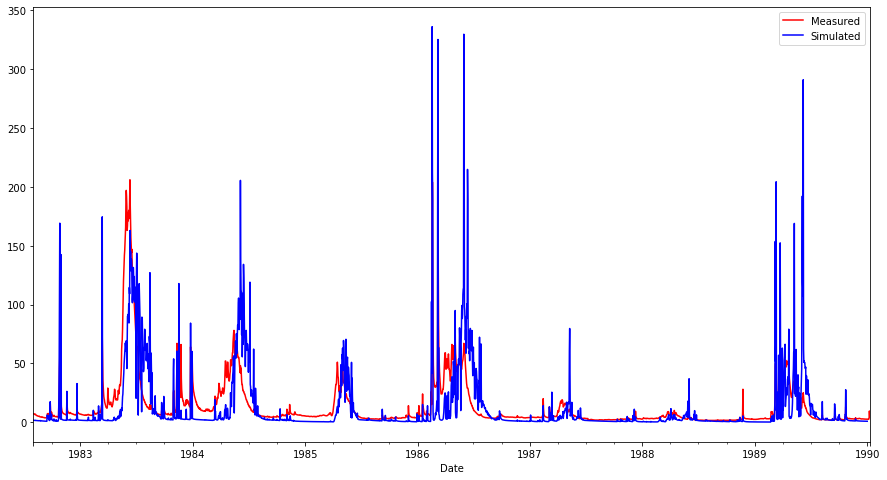

In [29]:
# Dialy Stream flow
# get measurments within the simulation period...
meas_data = gs.prms.data.data_df  # Data object in PRMS
mask = np.logical_and(meas_data['Date']>=pd.Timestamp('1982-08-01'),  meas_data['Date']<=pd.Timestamp('1990-01-11'))
measure_data = gs.prms.data.data_df[mask]

# get simulation results
simData = gs.prms.stat.stat_df  # Results from StatVar file

# plot simulated vs. measured flow
ax = measure_data.plot(x= 'Date' , y= 'runoff_0', color = 'r', label = 'Measured')
simData.plot(ax=ax, x= 'Date' , y= 'basin_cfs_1', color = 'b', label = 'Simulated', figsize = (15,8))
plt.legend()
measure_data

#### Monthly Stream flow


Text(0, 0.5, 'Simulated flow (cfs)')

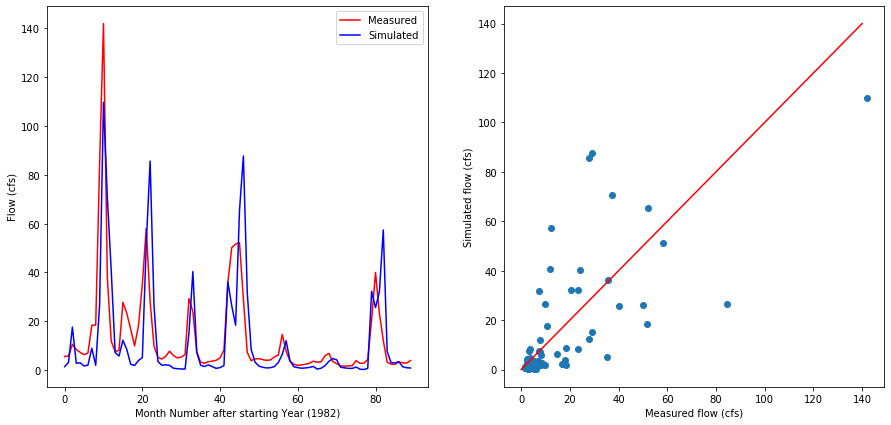

In [30]:
# Monthly average for streamflow measurements
monthly_meas = measure_data.groupby([measure_data.Date.dt.year, measure_data.Month]).mean()
monthly_sim = simData.groupby([simData.Date.dt.year, simData.Month]).mean()

# Plots
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(monthly_meas['runoff_0'].values, 'r', label = 'Measured')
plt.plot(monthly_sim['basin_cfs_1'].values, 'b', label = 'Simulated')
plt.xlabel("Month Number after starting Year (1982)")
plt.ylabel("Flow (cfs)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(monthly_meas['runoff_0'].values,monthly_sim['basin_cfs_1'].values ); plt.plot([0,140],[0,140],'r')
plt.xlabel("Measured flow (cfs)")
plt.ylabel("Simulated flow (cfs)")


### (4.b) Compute Error Metric

In [31]:
def calculate_error(gs):
    """
    This function calculates mean squared error for simulated stream flow.
    """
    meas_data = gs.prms.data.data_df # get measured data
    # Get data for simulated period
    mask = np.logical_and(meas_data['Date']>=pd.Timestamp('1982-08-01'),  meas_data['Date']<=pd.Timestamp('1990-01-01'))    
    measure_data = gs.prms.data.data_df[mask]
    
    # get simulated values
    simData = gs.prms.stat.stat_df
    
    # compute error
    err = simData['basin_cfs_1'].values - measure_data['runoff_0'].values
    # compute mean squared error
    rmse = (np.mean(np.power(err, 2.0)))**0.5
    return rmse

### (4.c) Simple Calibration
Change one parameter at a time. This method can be useful when input parameters are independent.
<img src = ".\figures\calibration_cycle.png">

In [32]:
orig_params.keys()

dict_keys(['snarea_curve', 'ssr2gw_rate', 'gwflow_coef'])

In [33]:
%%time
parameters = ['gwflow_coef', 'snarea_curve', 'ssr2gw_rate']
factors = [ 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
all_errors = {}
for par in parameters:    
    errors = []
    for facc in factors:
        print("\n****** Par =  {}, Facc = {} ****** ".format(par, facc))
        
        # change input parameters
        Params.set_values(name=par, values = orig_params[par]*facc) # change the parameter
        
        # write input files
        gs.write_input(workspace=os.path.join(".", "data", "temp"))              # write input
        
        # run the model
        gs.run_model()                                              # run the model
        
        # load the results
        gs.prms.get_StatVar()                                       # load load results from Statvar 
        
        # calculate the error
        err = calculate_error(gs)                                    # compute the mean square error
        errors.append(err)
        
    all_errors[par] = errors
    Params.set_values(name=par, values=orig_params[par])
   



****** Par =  gwflow_coef, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results 

Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:41:38

Execution end   date and time (


Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:41:57

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:42:01

Execution elapsed time    0 minutes  4.39 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.


                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:42:15

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:42:19

Execution elapsed time    0 minutes  4.53 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 1.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\exa

Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 2.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results reques

Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:42:57

Execution end   date and time (


Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:43:15

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2021/07/01 12:43:19

Execution elapsed time    0 minutes  4.33 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 2.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Writing Control file ...
Writing Parameters files ...
Writing Data file ...
Writing Modflow files...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.e

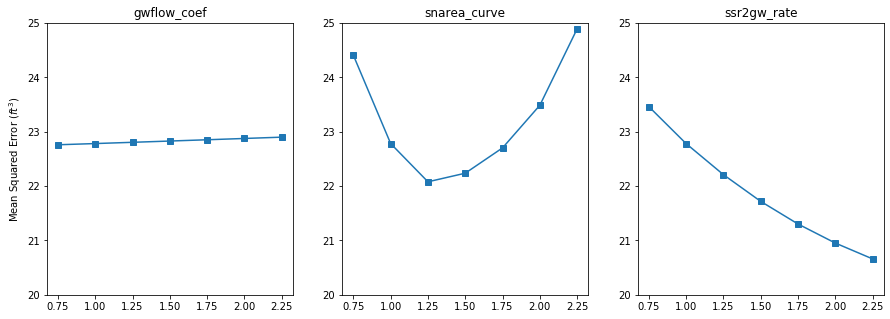

In [34]:
plt.figure(figsize=(15,5))
i = 1
for par in all_errors.keys():
    plt.subplot(1,3,i)
    plt.plot(factors, all_errors[par], label = par, marker='s' )
    if i == 1:
        plt.ylabel("Mean Squared Error " + r"$(ft^{3})$")
    i = i + 1
    plt.ylim([20, 25])
    plt.title(par)

plt.show()
    

### Remember: This calibration method is usefull only if input parameters are independent. In external calibration software, parameters can be changed and evaluated concurrently.